In [ ]:
# Outlier --> data mean ko flactuate krta hai

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/newplacementdata.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [ ]:
# Even = ((n/2) + ((n/2)+1))/2
# odd = ((n/2)+1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

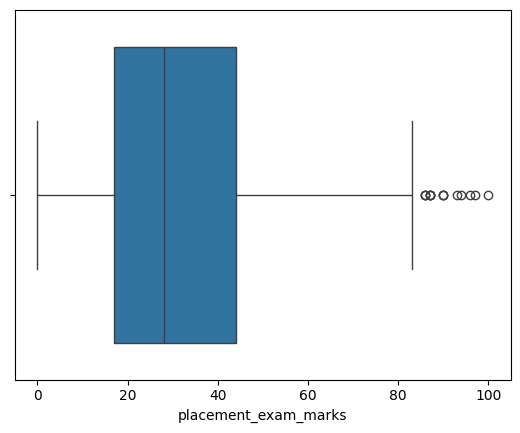

In [ ]:
sns.boxplot(x = df['placement_exam_marks'])

In [ ]:
# Finding the IRQ

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [ ]:
percentile25

17.0

In [ ]:
percentile75

44.0

In [ ]:
IQR = percentile75 - percentile25
IQR

27.0

In [ ]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

84.5

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-23.5

In [ ]:
# Finding Our Outlier

In [ ]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [ ]:
df[df['placement_exam_marks'] <lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
#1>  Trimming (outlier Removing Technique)

In [ ]:
newdf = df[df['placement_exam_marks'] < upper_limit]

In [ ]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [ ]:
#  Comparision

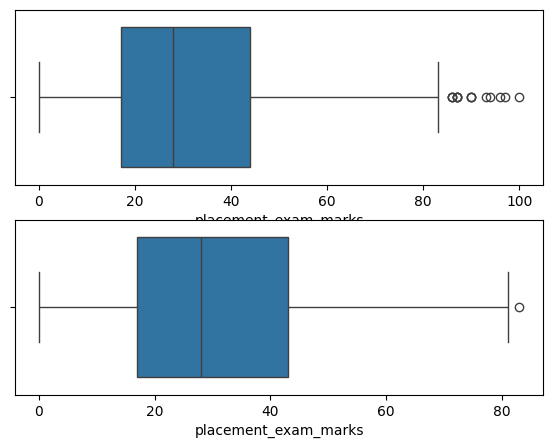

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = newdf['placement_exam_marks'])
plt.show()

In [ ]:
#2>  Capping

In [ ]:
new_df_cap = df.copy()

In [ ]:
# min = 5 , max =15
# min 4,3,2,1
# max = 20,30,50

# updated_min_value = 1
# updates_max_value = 50

In [ ]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit ,
        new_df_cap['placement_exam_marks'])

)

In [ ]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


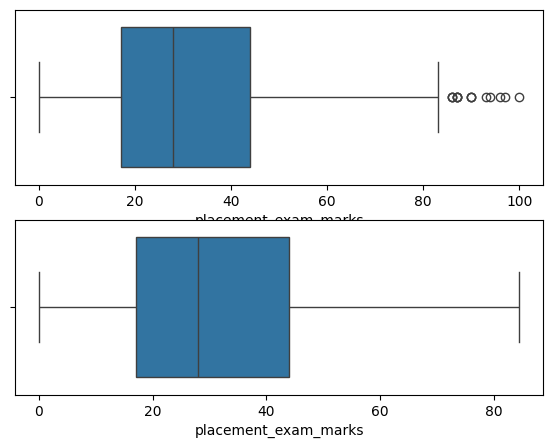

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['placement_exam_marks'])
plt.show()

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df['Age'].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


<Axes: xlabel='Age'>

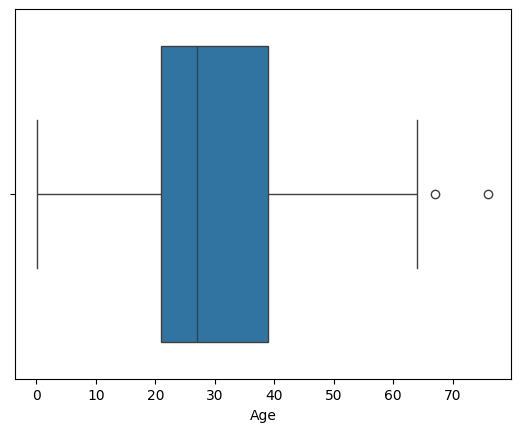

In [ ]:
sns.boxplot(x = df['Age'])

In [ ]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [ ]:
percentile25

21.0

In [ ]:
percentile75

39.0

In [ ]:
IQR = percentile75 - percentile25
IQR

18.0

In [ ]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

66.0

In [ ]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-6.0

In [ ]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S


In [ ]:
df[df['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
x =  df[df['Age'] < upper_limit]

In [ ]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


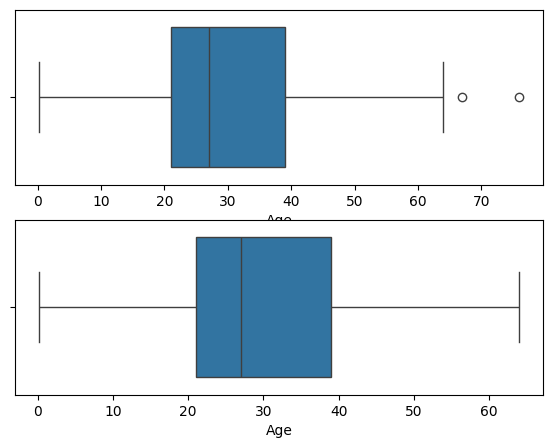

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = x['Age'])
plt.show()

In [ ]:
# Capping

In [ ]:
new_cap = df.copy()

In [ ]:
new_cap['Age']=np.where(
    new_cap['Age']>upper_limit,
    upper_limit,

    np.where(
        new_cap['Age']<lower_limit,
        lower_limit,
        new_cap['Age'])
)

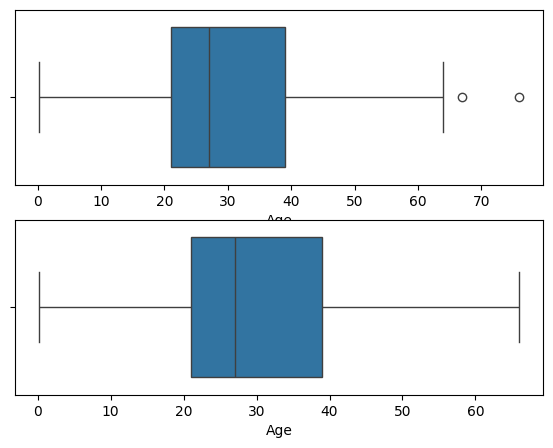

In [ ]:
plt.figure(figsize= (15,5))
plt.subplot(222)
sns.boxplot(x = df['Age'])

plt.subplot(224)
sns.boxplot(x = new_cap['Age'])
plt.show()